# 김지성

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import seaborn as sns

from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.unicode_minus'] = False

<ipython-input-2-1ff8e69f923a>:11: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [ ]:
df=pd.read_csv('/gdrive/MyDrive/project_1/여가유형선호도.csv',parse_dates=['EXAMIN_BEGIN_DE'])

In [ ]:
df

,Unnamed: 0,RESPOND_ID,EXAMIN_BEGIN_DE,SEXDSTN_FLAG_CD,AGRDE_FLAG_NM,ANSWRR_OC_AREA_NM,HSHLD_INCOME_DGREE_NM,CLTUR_ART_VIEWNG_INTRST_DGREE_VALUE,CLTUR_ART_ACT_INTRST_DGREE_VALUE,SPORTS_VIEWNG_INTRST_DGREE_VALUE,SPORTS_ACT_INTRST_DGREE_VALUE,TURSM_TOUR_INTRST_DGREE_VALUE,RCRT_REST_INTRST_DGREE_VALUE,SELF_IMPT_SELF_MANAGE_INTRST_DGREE_VALUE,SCT_EXCHG_INTRST_DGREE_VALUE
0,0,559,2021-11-10,F,40대,충청북도,700만원 이상,매우 작아졌다,매우 작아졌다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다
1,1,1013,2021-11-10,M,60대,강원도,300이상500만원 미만,비슷하다,비슷하다,비슷하다,비슷하다,조금 커졌다,비슷하다,비슷하다,비슷하다
2,2,2804,2021-11-10,M,40대,인천광역시,300이상500만원 미만,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,조금 커졌다,조금 커졌다,조금 커졌다
3,3,4377,2021-11-10,F,30대,대구광역시,500이상700만원 미만,비슷하다,비슷하다,비슷하다,비슷하다,매우 커졌다,비슷하다,조금 커졌다,비슷하다
4,4,5180,2021-11-10,M,40대,부산광역시,300이상500만원 미만,조금 작아졌다,조금 작아졌다,비슷하다,비슷하다,조금 커졌다,비슷하다,비슷하다,비슷하다
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19886,522,53377330,2023-01-25,F,50대,충청남도,500이상700만원 미만,조금 작아졌다,조금 작아졌다,비슷하다,비슷하다,비슷하다,조금 커졌다,비슷하다,비슷하다
19887,523,53377445,2023-01-25,F,50대,서울특별시,700만원 이상,조금 작아졌다,조금 커졌다,비슷하다,비슷하다,조금 커졌다,비슷하다,비슷하다,비슷하다
19888,524,53377478,2023-01-25,F,60대,경기도,700만원 이상,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다
19889,525,53377482,2023-01-25,F,60대,서울특별시,300만원 미만,매우 커졌다,매우 작아졌다,매우 커졌다,매우 커졌다,매우 커졌다,비슷하다,매우 커졌다,매우 커졌다


In [ ]:
date_list = list(df['EXAMIN_BEGIN_DE'].value_counts().index.sort_values())
date_list=[date.strftime('%Y-%m-%d') for date in date_list]
df.index=df['EXAMIN_BEGIN_DE']
df=df.iloc[:,2:]

In [ ]:
df

,EXAMIN_BEGIN_DE,SEXDSTN_FLAG_CD,AGRDE_FLAG_NM,ANSWRR_OC_AREA_NM,HSHLD_INCOME_DGREE_NM,CLTUR_ART_VIEWNG_INTRST_DGREE_VALUE,CLTUR_ART_ACT_INTRST_DGREE_VALUE,SPORTS_VIEWNG_INTRST_DGREE_VALUE,SPORTS_ACT_INTRST_DGREE_VALUE,TURSM_TOUR_INTRST_DGREE_VALUE,RCRT_REST_INTRST_DGREE_VALUE,SELF_IMPT_SELF_MANAGE_INTRST_DGREE_VALUE,SCT_EXCHG_INTRST_DGREE_VALUE
EXAMIN_BEGIN_DE,,,,,,,,,,,,,
2021-11-10,2021-11-10,F,40대,충청북도,700만원 이상,매우 작아졌다,매우 작아졌다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다
2021-11-10,2021-11-10,M,60대,강원도,300이상500만원 미만,비슷하다,비슷하다,비슷하다,비슷하다,조금 커졌다,비슷하다,비슷하다,비슷하다
2021-11-10,2021-11-10,M,40대,인천광역시,300이상500만원 미만,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,조금 커졌다,조금 커졌다,조금 커졌다
2021-11-10,2021-11-10,F,30대,대구광역시,500이상700만원 미만,비슷하다,비슷하다,비슷하다,비슷하다,매우 커졌다,비슷하다,조금 커졌다,비슷하다
2021-11-10,2021-11-10,M,40대,부산광역시,300이상500만원 미만,조금 작아졌다,조금 작아졌다,비슷하다,비슷하다,조금 커졌다,비슷하다,비슷하다,비슷하다
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25,2023-01-25,F,50대,충청남도,500이상700만원 미만,조금 작아졌다,조금 작아졌다,비슷하다,비슷하다,비슷하다,조금 커졌다,비슷하다,비슷하다
2023-01-25,2023-01-25,F,50대,서울특별시,700만원 이상,조금 작아졌다,조금 커졌다,비슷하다,비슷하다,조금 커졌다,비슷하다,비슷하다,비슷하다
2023-01-25,2023-01-25,F,60대,경기도,700만원 이상,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다,비슷하다


In [ ]:
def make_df(df, date_list, option_1, option_2, option_3):
    data=df[df[option_1]==option_2].loc[date_list[:]]
#     display(data)
    df_=pd.DataFrame()
    for i in range(len(date_list)):
        make_=pd.DataFrame(data.loc[date_list[i]][option_3].value_counts()).sort_index()
#         display(make_)
        df_=pd.concat([df_,make_],axis=1)
#     display(make_)
    df_.columns=date_list
    df_.fillna(0,inplace=True)
    return df_.T


In [ ]:
def age_category_df(category):
    age=['20대','30대','40대','50대','60대']
#     df.index = df.index.astype('str')
    make_df = pd.DataFrame()
    for age_ in age:
        make_df=pd.concat([make_df,df[df['AGRDE_FLAG_NM']==age_][category].value_counts(True)],axis=1)
    make_df.columns=age
    return make_df.T

In [ ]:
def draw_stacked_bar(data,title):
    plt.figure(figsize=(15,10))
    plt.rc('legend', fontsize=16)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.title(title,fontsize=20)
#     plt.colormaps('Set3')

    colors = sns.color_palette('Set1',20)

    plt.bar(data.index,data['조금 커졌다'],label='조금 커졌다',width=0.3,color=colors[0],
           edgecolor='black',alpha=0.7)
    plt.bar(data.index,data['조금 작아졌다'],label='조금 작아졌다',width=0.3,color=colors[1],
           edgecolor='black',alpha=1.0)
#     plt.bar(data.index,data['매우 커졌다'],label='많이 커짐',width=0.5,color=colors[2],
#            edgecolor='black',alpha=0.4)
    # plt.bar(age_impt.index,age_impt['매우 작아졌다'],label='많이 작아짐')
    plt.legend()


In [ ]:
def column_year_df(column):
    self_view_df=pd.DataFrame()
    for date in date_list:
        view_df=df[column].loc[date]
        view_df=pd.DataFrame(view_df.value_counts())
        self_view_df=pd.concat([self_view_df,view_df],axis=1)
    self_view_df.columns=date_list
    self_view_df = self_view_df.T
    self_view_df=self_view_df[['매우 작아졌다','조금 작아졌다','조금 커졌다']]
    x_date_list = [datetime.strptime(d,'%Y-%m-%d') for d in self_view_df.index]
    return self_view_df,x_date_list

In [ ]:
from matplotlib import dates
def line_plot(line_df,x_date_list,title,vline=None,x=None,sigma=9):
    plt.figure(figsize=(15,10))
    # plt.rc('axes',labelsize=20)
#     plt.rc('figure', titlesize=20)
    plt.rc('legend', fontsize=16)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    plt.title(title,fontsize=20)
#     x = list(line_df.index)
    smooth_y1 = gaussian_filter1d(line_df['조금 커졌다'], sigma=sigma)
    smooth_y2 = gaussian_filter1d(line_df['조금 작아졌다'], sigma=sigma)
    smooth_y3 = gaussian_filter1d(line_df['매우 작아졌다'], sigma=sigma)
    plt.xticks(rotation=90)
    plt.plot(x_date_list,smooth_y1,label='조금 커짐',linewidth=2)
    plt.plot(x_date_list,smooth_y2,label='조금 작아짐',linewidth=2)
    plt.plot(x_date_list,smooth_y3,label='많이 작아짐',linewidth=2)

    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))

    plt.axvline(x=vline, color='r', linewidth=3, linestyle='--')

    plt.legend()

    plt.show()

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (47.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and dir

In [ ]:
plt.rc('font', family='NanumBarunGothic')

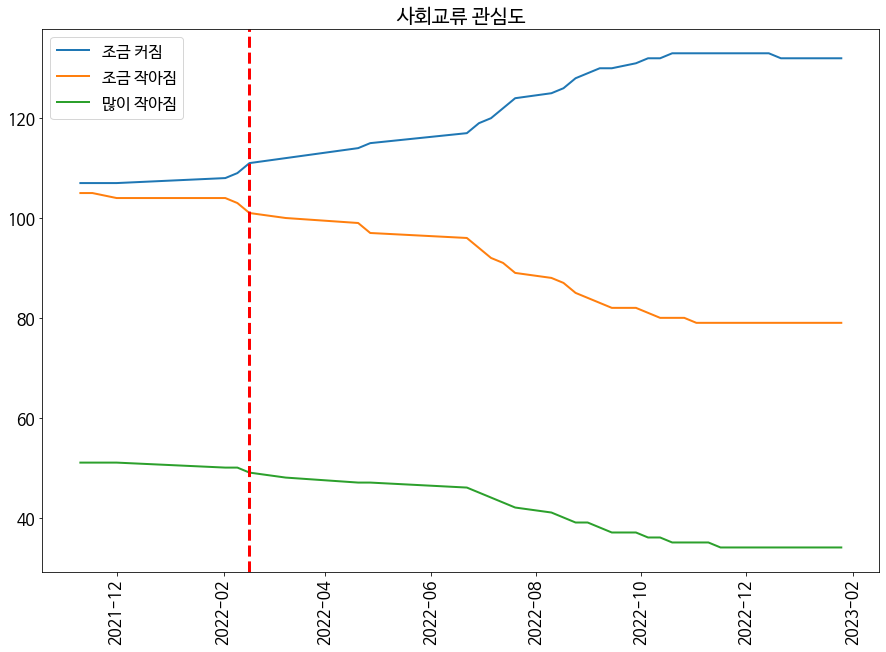

In [ ]:
sct_exchg,x=column_year_df('SCT_EXCHG_INTRST_DGREE_VALUE')
line_plot(sct_exchg,x,'사회교류 관심도',vline=datetime(2022,2,16))

In [ ]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

from datetime import datetime, timedelta
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import seaborn as sns

In [ ]:
df=pd.read_csv('/gdrive/MyDrive/project_1/여가유형.csv',parse_dates=['EXAMIN_BEGIN_DE'])
date = sorted(list(df['EXAMIN_BEGIN_DE'].value_counts().index))

In [ ]:
df

,Unnamed: 0,RESPOND_ID,EXAMIN_BEGIN_DE,SEXDSTN_FLAG_CD,AGRDE_FLAG_NM,ANSWRR_OC_AREA_NM,HSHLD_INCOME_DGREE_NM,LSR_TIME_USE_PURPS_RN1_VALUE,LSR_TIME_USE_PURPS_RN2_VALUE
0,0,559,2021-11-10,F,40대,충청북도,700만원 이상,대인 관계-교제를 위해,자기만족-즐거움을 위해
1,1,1013,2021-11-10,M,60대,강원도,300이상500만원 미만,건강 관리를 위해,남는 시간을 보내기 위해
2,2,2804,2021-11-10,M,40대,인천광역시,300이상500만원 미만,대인 관계-교제를 위해,마음의 안정-휴식을 위해
3,3,4377,2021-11-10,F,30대,대구광역시,500이상700만원 미만,마음의 안정-휴식을 위해,가족-지인 등과 시간을 보내기 위해
4,4,5180,2021-11-10,M,40대,부산광역시,300이상500만원 미만,가족-지인 등과 시간을 보내기 위해,마음의 안정-휴식을 위해
...,...,...,...,...,...,...,...,...,...
18219,520,53376878,2023-02-22,M,40대,강원도,500이상700만원 미만,가족-지인 등과 시간을 보내기 위해,마음의 안정-휴식을 위해
18220,521,53377071,2023-02-22,M,40대,대구광역시,300만원 미만,가족-지인 등과 시간을 보내기 위해,마음의 안정-휴식을 위해
18221,522,53377188,2023-02-22,F,40대,전라남도,700만원 이상,건강 관리를 위해,마음의 안정-휴식을 위해
18222,523,53377236,2023-02-22,M,40대,경기도,300이상500만원 미만,자기만족-즐거움을 위해,마음의 안정-휴식을 위해


In [ ]:
category_df = pd.DataFrame()
for d in date:
    category_df=pd.concat(
        [category_df,
         pd.DataFrame(df[df['EXAMIN_BEGIN_DE']==d]['LSR_TIME_USE_PURPS_RN1_VALUE'].value_counts())
        ],axis=1
         )
category_df.columns=date

In [ ]:
category_df = category_df.T

In [ ]:
category_df.index = pd.to_datetime(list(category_df.index), format='%Y%m%d')

In [ ]:
category_df.columns=['자기만족','힐링','사람들과 함께 보냄','건강 관리',
                     '스트레스 해소','자기 계발','대인 관계 교류','킬링타임','기타']

In [ ]:
category_df

,자기만족,힐링,사람들과 함께 보냄,건강 관리,스트레스 해소,자기 계발,대인 관계 교류,킬링타임,기타
2021-11-10,116.0,110.0,87.0,64.0,61.0,39.0,17.0,14.0,NaN
2021-12-01,108.0,110.0,88.0,65.0,65.0,26.0,22.0,16.0,1.0
2021-12-08,125.0,102.0,75.0,67.0,46.0,36.0,26.0,28.0,1.0
2021-12-15,109.0,107.0,83.0,67.0,73.0,36.0,18.0,21.0,NaN
2021-12-22,121.0,111.0,91.0,78.0,63.0,26.0,16.0,23.0,1.0
2021-12-29,94.0,129.0,97.0,48.0,71.0,31.0,18.0,29.0,NaN
2022-01-05,97.0,129.0,98.0,53.0,65.0,27.0,10.0,24.0,1.0
2022-03-09,93.0,95.0,123.0,86.0,69.0,36.0,30.0,11.0,1.0
2022-03-16,105.0,94.0,83.0,97.0,48.0,34.0,29.0,10.0,2.0
2022-04-13,96.0,76.0,97.0,94.0,63.0,37.0,29.0,11.0,NaN


In [ ]:
import bar_chart_race as bcr
bcr.bar_chart_race(df=category_df.iloc[::2],
                   n_bars=8,
                   period_length=800,
                   cmap='Set3',
                   filename='./category_animation.gif')

In [ ]:
age=['20대','30대','40대','50대','60대']
age_category_df = pd.DataFrame()
for d in date:
    age_df = df[(df['EXAMIN_BEGIN_DE']==d) & (df['AGRDE_FLAG_NM']==age[3])]\
    ['LSR_TIME_USE_PURPS_RN1_VALUE']
    age_df = pd.DataFrame(age_df.value_counts(True))
    age_df.columns=[d]
    age_category_df = pd.concat([age_category_df,age_df],axis=1)
#     print(age_df.value_counts())
#     print('-------')


In [ ]:
age_category_df = age_category_df.T
age_category_df

,자기만족-즐거움을 위해,마음의 안정-휴식을 위해,가족-지인 등과 시간을 보내기 위해,건강 관리를 위해,스트레스 해소를 위해,자기 계발을 위해,대인 관계-교제를 위해,남는 시간을 보내기 위해,기타
2021-11-10,0.200000,0.191304,0.191304,0.182609,0.095652,0.078261,0.034783,0.026087,NaN
2021-12-01,0.122807,0.263158,0.184211,0.236842,0.078947,0.052632,0.035088,0.026316,NaN
2021-12-08,0.278261,0.182609,0.147826,0.182609,0.069565,0.034783,0.052174,0.052174,NaN
2021-12-15,0.194915,0.177966,0.177966,0.194915,0.110169,0.076271,0.050847,0.016949,NaN
2021-12-22,0.206612,0.206612,0.190083,0.214876,0.090909,0.041322,0.033058,0.016529,NaN
2021-12-29,0.162393,0.264957,0.162393,0.076923,0.145299,0.094017,0.051282,0.042735,NaN
2022-01-05,0.210526,0.245614,0.228070,0.105263,0.114035,0.026316,0.026316,0.035088,0.008772
2022-03-09,0.163934,0.155738,0.196721,0.270492,0.049180,0.098361,0.049180,0.008197,0.008197
2022-03-16,0.146552,0.241379,0.163793,0.241379,0.051724,0.077586,0.077586,NaN,NaN
2022-04-13,0.200000,0.156522,0.217391,0.200000,0.043478,0.095652,0.060870,0.026087,NaN


In [ ]:
pivot_age_df=pd.DataFrame()
# pivot_df=pd.DataFrame()
for d in date:
    pivot_df=pd.DataFrame(age_category_df.loc[d].sort_values(ascending=False))
#     print(pivot_df)
    pivot_df[d]=pivot_df.index
    pivot_df = pivot_df.T
    pivot_df.columns=range(1,10)
#     pivot_df.col
    pivot_age_df=pd.concat([pivot_age_df,pivot_df.T],axis=1)
pivot_age_df=pivot_age_df.T.iloc[:,:8]

In [ ]:
pivot_age_df

,1,2,3,4,5,6,7,8
2021-11-10,자기만족-즐거움을 위해,마음의 안정-휴식을 위해,가족-지인 등과 시간을 보내기 위해,건강 관리를 위해,스트레스 해소를 위해,자기 계발을 위해,대인 관계-교제를 위해,남는 시간을 보내기 위해
2021-12-01,마음의 안정-휴식을 위해,건강 관리를 위해,가족-지인 등과 시간을 보내기 위해,자기만족-즐거움을 위해,스트레스 해소를 위해,자기 계발을 위해,대인 관계-교제를 위해,남는 시간을 보내기 위해
2021-12-08,자기만족-즐거움을 위해,마음의 안정-휴식을 위해,건강 관리를 위해,가족-지인 등과 시간을 보내기 위해,스트레스 해소를 위해,대인 관계-교제를 위해,남는 시간을 보내기 위해,자기 계발을 위해
2021-12-15,자기만족-즐거움을 위해,건강 관리를 위해,마음의 안정-휴식을 위해,가족-지인 등과 시간을 보내기 위해,스트레스 해소를 위해,자기 계발을 위해,대인 관계-교제를 위해,남는 시간을 보내기 위해
2021-12-22,건강 관리를 위해,자기만족-즐거움을 위해,마음의 안정-휴식을 위해,가족-지인 등과 시간을 보내기 위해,스트레스 해소를 위해,자기 계발을 위해,대인 관계-교제를 위해,남는 시간을 보내기 위해
2021-12-29,마음의 안정-휴식을 위해,자기만족-즐거움을 위해,가족-지인 등과 시간을 보내기 위해,스트레스 해소를 위해,자기 계발을 위해,건강 관리를 위해,대인 관계-교제를 위해,남는 시간을 보내기 위해
2022-01-05,마음의 안정-휴식을 위해,가족-지인 등과 시간을 보내기 위해,자기만족-즐거움을 위해,스트레스 해소를 위해,건강 관리를 위해,남는 시간을 보내기 위해,자기 계발을 위해,대인 관계-교제를 위해
2022-03-09,건강 관리를 위해,가족-지인 등과 시간을 보내기 위해,자기만족-즐거움을 위해,마음의 안정-휴식을 위해,자기 계발을 위해,스트레스 해소를 위해,대인 관계-교제를 위해,남는 시간을 보내기 위해
2022-03-16,마음의 안정-휴식을 위해,건강 관리를 위해,가족-지인 등과 시간을 보내기 위해,자기만족-즐거움을 위해,자기 계발을 위해,대인 관계-교제를 위해,스트레스 해소를 위해,남는 시간을 보내기 위해
2022-04-13,가족-지인 등과 시간을 보내기 위해,자기만족-즐거움을 위해,건강 관리를 위해,마음의 안정-휴식을 위해,자기 계발을 위해,대인 관계-교제를 위해,스트레스 해소를 위해,남는 시간을 보내기 위해


In [ ]:
def continuous_seq(kwd):
    arr = np.array(np.where(month_rank.values==kwd))
    _, length = arr.shape
    ret, st = [], 0
    for i in range(1, length):
        if arr[0, i-1]+1 != arr[0, i]:
            ret.append(arr[:, st:i])
            st = i
    ret.append(arr[:, st:])
    return ret

def highlight(kwd, color, ax):
    lsts = continuous_seq(kwd)
    for lst in lsts:
        ax.plot(lst[0,:], lst[1,:],
                marker='o', ms=15, lw=2.5,
                color=color, zorder=0)

        ax.scatter(lst[0,:], lst[1,:],
                marker='o', s=110,
                color='white', zorder=10)
    return ax

def ranking(kwds):
    fig = plt.figure(figsize=(35, 23))
    ax = plt.axes()
    total_kwds = pd.Series(month_rank.values.flatten()).unique()

    for kwd in total_kwds:
        highlight(kwd, '#E0E0E0', ax)


    color_tot = sns.color_palette("Set1", 14)[::2]
    kwd_color = {k:c for k, c in zip(kwds, color_tot)}
    for kwd in kwds:
        highlight(kwd, kwd_color[kwd], ax)

    ax.invert_yaxis()
    ax.set_xticks(range(35))
    ax.set_xticklabels(pd.to_datetime(month_rank.index, format='%Y%m').strftime('%m\n%Y'),
                       fontweight='bold', fontsize=15)
    ax.set_xlim(-0.2, 30.2)
    ax.set_yticks(range(8))
    ax.set_yticklabels([f'Rank {i}' for i in range(1, 9)],
                       fontweight='bold', fontsize=15, color='gray')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    title_tmp = ['\"'+k+'\"' for k in kwds]
    ax.set_title(f'월별 {",".join(title_tmp)} 키워드 순위', weight='bold',
                 fontsize=25, fontweight='bold')


    plt.show()

In [ ]:
month_rank=pivot_age_df
month_rank.columns.names=['search_rank_nm']
month_rank.index.names=['base_ym']

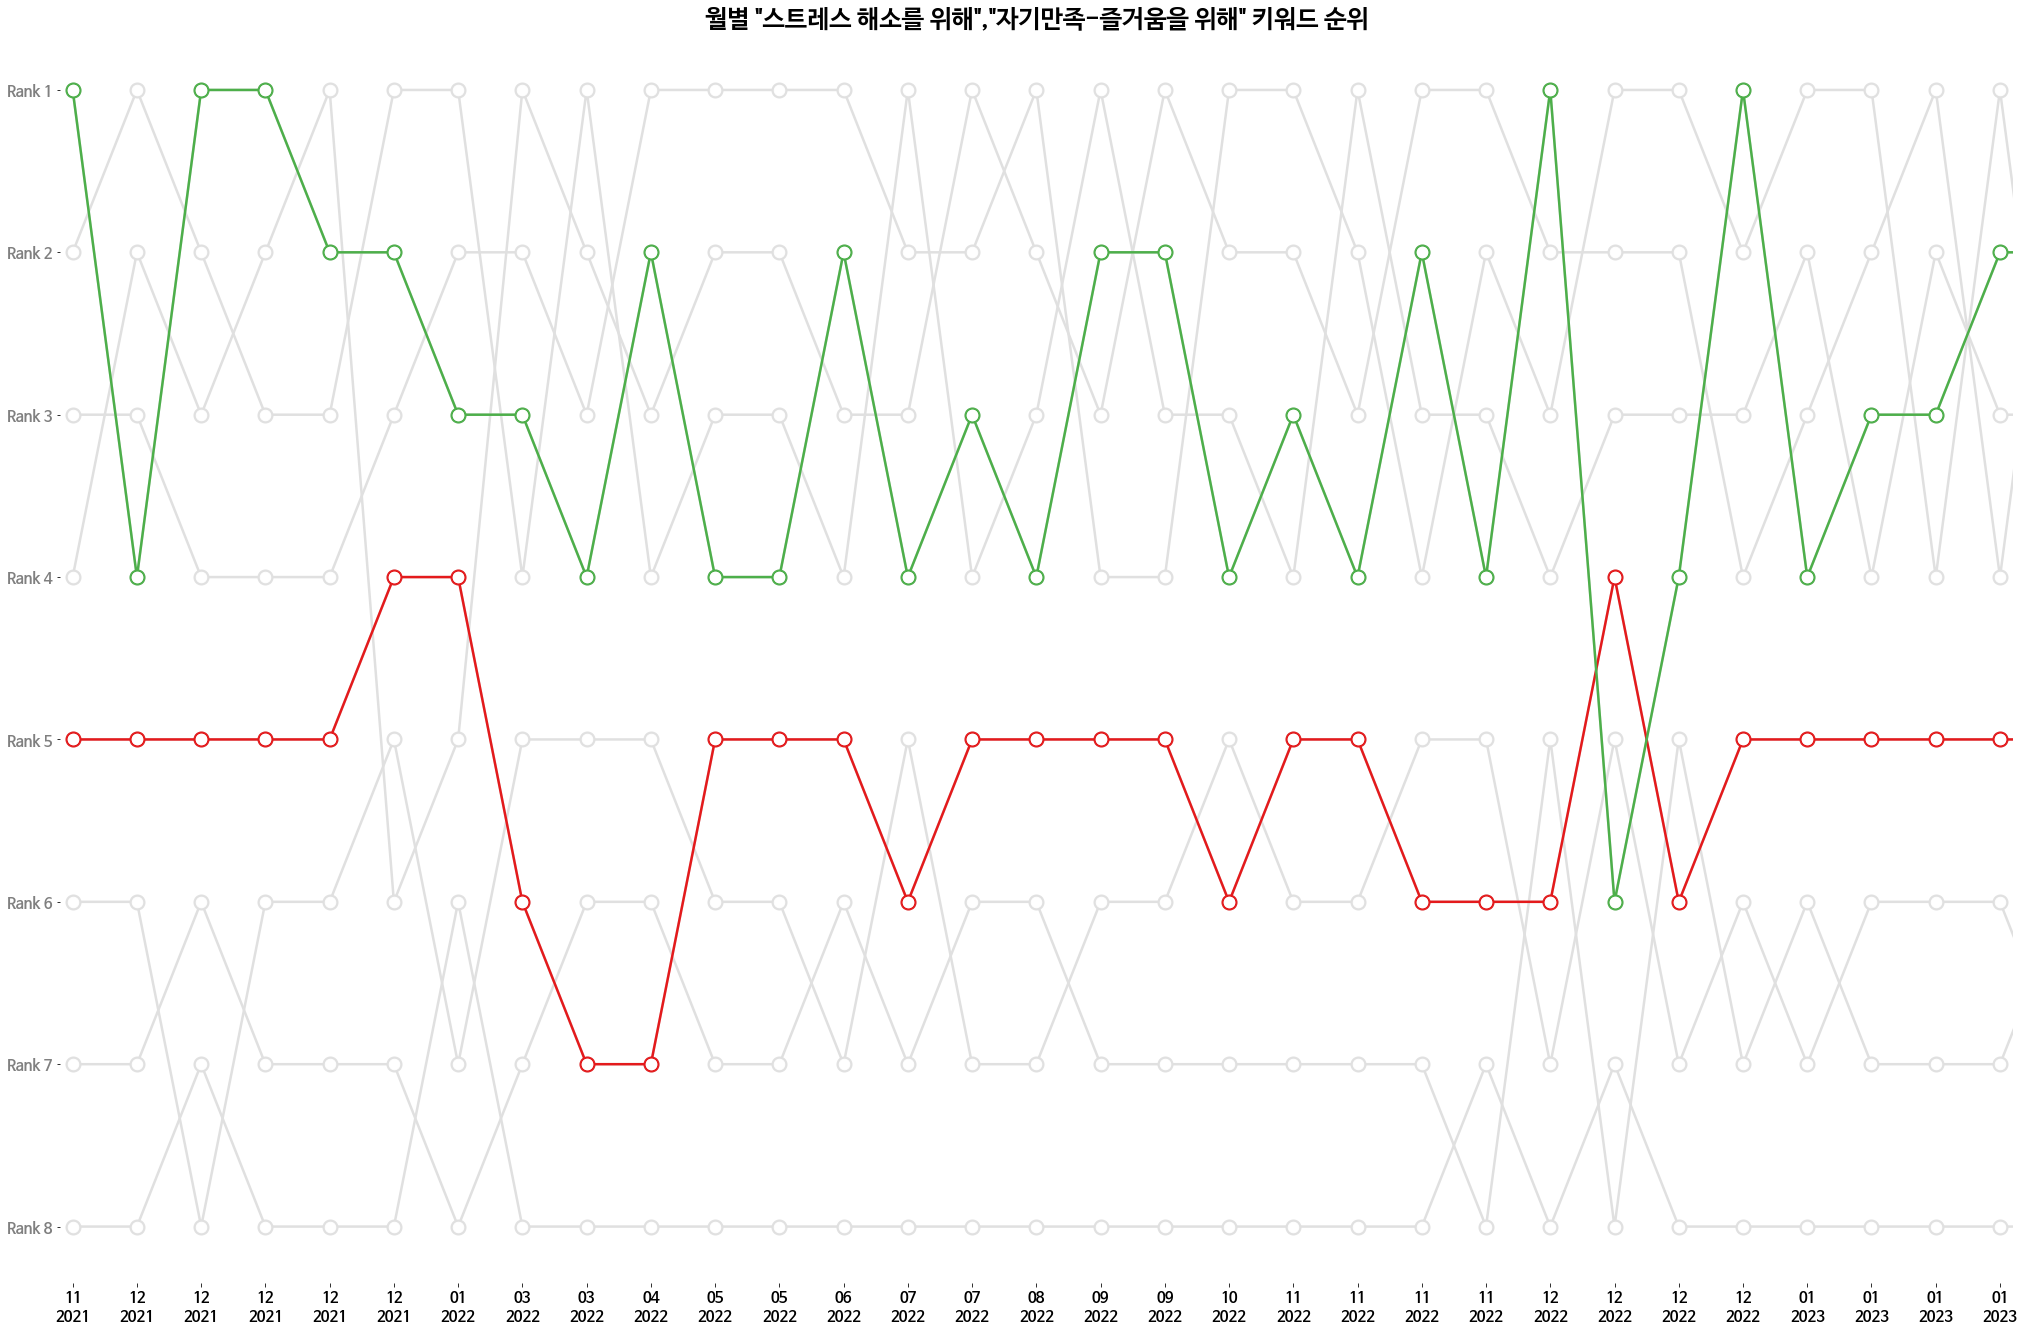

In [ ]:
ranking(['스트레스 해소를 위해','자기만족-즐거움을 위해'])

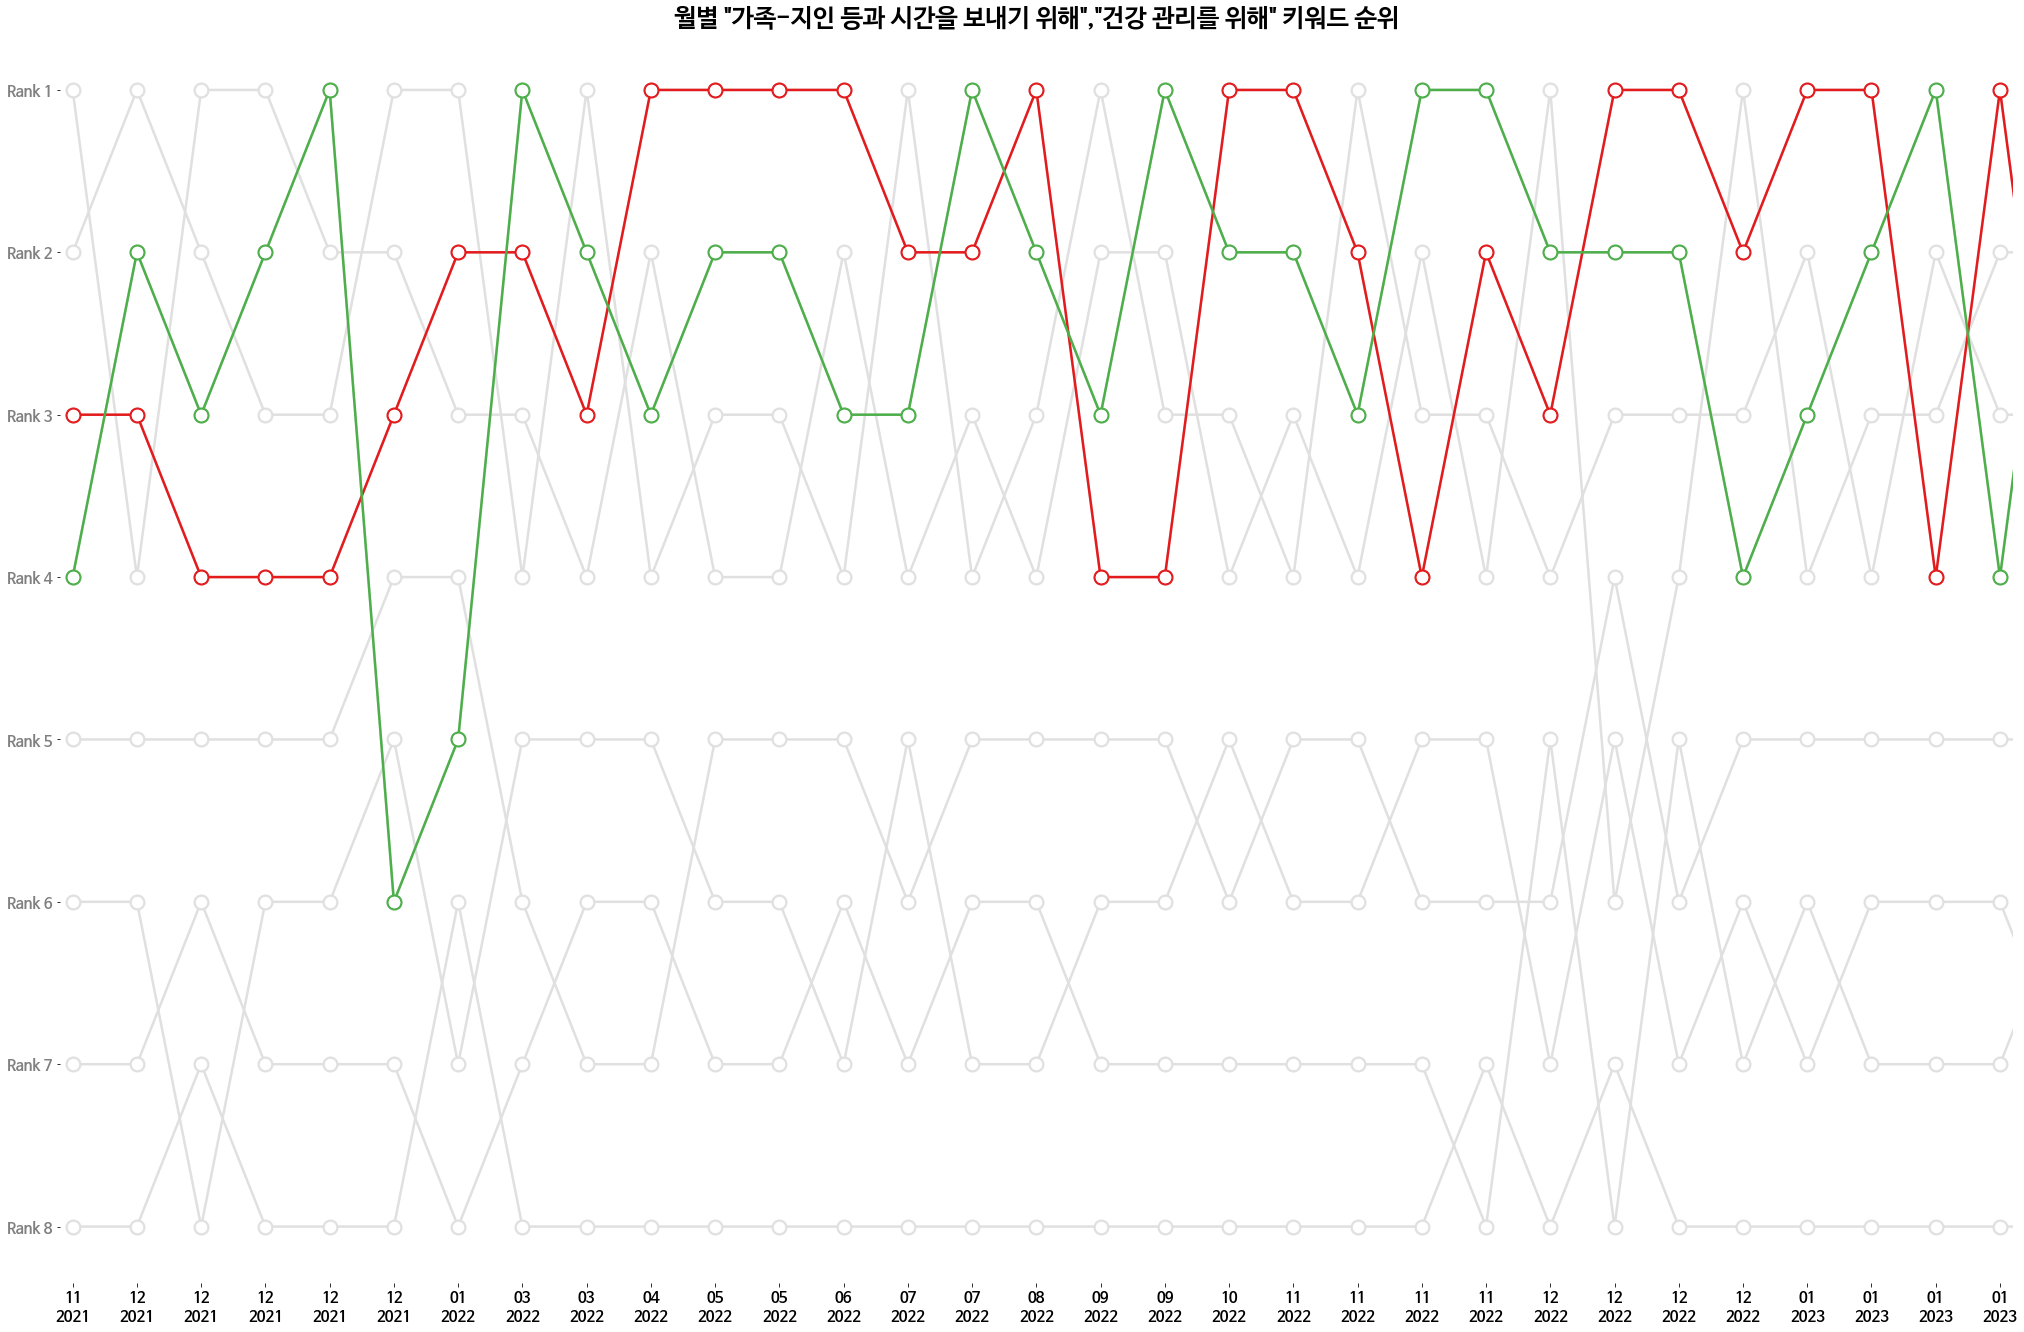

In [ ]:
ranking(['가족-지인 등과 시간을 보내기 위해','건강 관리를 위해'])

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.0 MB/s eta 0:00:00


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 42.2 MB/s eta 0:00:00


In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [ ]:
cd /gdrive/MyDrive/project_1/

/gdrive/MyDrive/project_1


In [ ]:
import pandas as pd
from IPython.display import display
from tqdm import tqdm, tqdm_notebook, trange
import sentencepiece as spm
import import_ipynb


import network
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import seaborn as sns

from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
from matplotlib import dates

<ipython-input-44-320874b9eddd>:19: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [ ]:
import requests
from bs4 import BeautifulSoup
import time
news_df = pd.DataFrame()
keyword = input("검색어 입력 : ")
page = int(input("페이지 입력 : "))

for i in range(1,page*10,10):
    response=requests.get(f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start={i}")
    html = response.text
    soup = BeautifulSoup(html,'html.parser')
    articls = soup.select('div.info_group')
    for article in articls:
        links = article.select("a.info")
        if len(links)>=2:
            url = links[1].attrs['href']
            response = requests.get(url,headers={'User-agent':'Mozila/5.0'})
            html = response.text
            soup = BeautifulSoup(html, 'html.parser')
            if "entertain" in response.url:
                title = soup.select_one(".end_tit")
                content = soup.select_one("#articeBody")
            elif "sports" in response.url:
                title = soup.select_one("h4.title")
                content = soup.select_one("#newsEndContents")
                divs = content.select("div")
                for div in divs:
                    div.decompose()
                p_tag = content.select("p")
                for p in p_tag:
                    p.decompose()

            else:
                content = soup.select_one('#dic_area')
                title = soup.select_one('.media_end_head_title')

#             dic = {'title':title.text,
#               'content':content.text}
            dic = {'content':title.text+content.text}
            df=pd.DataFrame.from_dict(dic,orient='index').T
            news_df = pd.concat([news_df,df],axis=0)
            print("page = {}".format(i//10+1))
            print('제목 : {}'.format(title.text))
            print('본문 : {}'.format(content.text))
            print('----------------------------------'.strip())
            time.sleep(0.3)



검색어 입력 : 2030 명품소비
페이지 입력 : 4
page = 1
제목 : 
"명품 가격 그렇게 올리더니"...올 들어 보복소비 '뚝'

본문 : 
기사내용 요약보복소비 끝..고물가에 생활비 오르자 명품 소비부터 줄여끝없이 올리는 가격 정책에 MZ세대 심리적 부담도 커져



[서울=뉴시스] 김근수 기자 = 프랑스 명품 브랜드 샤넬이 전 제품 가격인상을 3∼11% 인상 발표한 가운데 3일 오전 서울 시내 한 백화점 입구에서 사람들이 제품을 구매하기 위해 줄 서 있다. 2022.11.03. ks@newsis.com[서울=뉴시스]이지영 기자 = 코로나 팬데믹으로 촉발된 보복소비 양상이 고물가에 급격히 수그러들면서 폭발적인 성장세를 보였던 명품 소비도 계속 꺾이고 있다.명품 매장 앞에 새벽부터 줄을 길게 서던 ‘오픈런’도 최근에는 주춤한 모양새다. 대기 번호표를 가장 먼저 받기 위해 밤샘도 불사했던 열혈 고객들은 이제 찾아보기 힘들다. 백화점 입구에 줄세워 있던 간이의자와 텐트도 모습을 감춘 지 오래다. 20일 유통 업계에 따르면 지난 1~2월 롯데·신세계·현대백화점의 명품 매출은 전년 동기 대비 평균 5%대 늘어나는 데 그쳤다. 롯데의 증가율이 5.0%, 신세계 5.3%, 현대 5.8%였다. 지난해 같은 기간 이들 세 곳의 명품 매출은 롯데가 전년 동기 대비 35.0%, 신세계 47.8%, 현대가 20.8% 불어났다.명품 성장세는 작년 하반기부터 꺾이기 시작했다. 상반기까지만 해도 두 자릿수 성장했지만 10월 8.1%, 11월 11.3%, 12월 6.0%로 점차 둔화하더니 올해 1월부터는 마이너스(-7.2%)로 돌아섰다.올해 백화점 명품 실적이 주춤한 가장 큰 이유는 고물가로 인한 소비 둔화 때문이다. 전문가들은 물가 상승으로 필수 소비재 부담이 커지면서 상대적으로 명품 등의 '사치재' 소비가 위축됐다고 진단했다. 여기에 명품 브랜드들의 일 년에도 수 차례씩 가격을 올리는 마케팅 관행이 주요 소비 층인 MZ세대의 심리적 부담감을 더 키운 것으로 해석된다.불과 

In [ ]:
news_df

,content
0,"\n""명품 가격 그렇게 올리더니""...올 들어 보복소비 '뚝'\n\n기사내용 요약보..."
0,"\n""쥐뿔도 없이 호텔·오마카세·명품…2030 분수 모르고 살기 좋은 韓""\n\n직..."
0,\n'남이 쓰던 물건? 오히려 좋아'…중고명품에 꽂힌 2030\n\n\n\n\n\n...
0,"\n명품으로 흥행한 백화점 3사, ‘MZ전문관’ 만든 이유는?\n\n\n\n\n\n..."
0,\n소비 심리 꺾여도 e커머스는 '명품' 외치는 이유는\n\n\n\n\n\n소비심리...
0,\n“100만원에 사서 100만원에 판다” 명품 중고시장 휩쓰는 2030 [돈그랑땡...
0,\n“150만원 중고명품 한달 쓰고 150만원에 팔았어요”[이슈픽]\n\nMZ세대 ...
0,"\n""칵테일 기대돼 40분이나 기다렸어요"" 위스키 첫 맛보는 2030 오감 공략[현..."
0,\n“물건 살 때 다시 팔수 있나 생각하라” 2030 중고거래 선수의 꿀팁 [돈그랑...
0,"\n명품에선 이미 '큰손'…""2030 男 잡아라"" 트렌드 성지 점령하는 이것\n\n..."


In [ ]:
news_df.to_csv('test.csv')

In [ ]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer



def makeDTM():
    t_file_name = open('./Title_List.txt', 'r', encoding='utf-8')

    title_list = []
    for line in t_file_name.readlines():
        title_list.append(line[:-1])

    t_file_name.close()
    dataset = pd.read_csv(f'./test.csv')


    tagger = Okt()

    for title in title_list:
        cv = CountVectorizer()
        corpus = []


        for doc_num in range(len(dataset)):
            noun_list = tagger.nouns(dataset[title].loc[doc_num])
            corpus.append(' '.join(noun_list))

        DTM_Array = cv.fit_transform(corpus).toarray()
        feature_names = cv.get_feature_names_out()
        DTM_DataFrmae = pd.DataFrame(DTM_Array, columns=feature_names)
        DTM_DataFrmae.to_csv('DTM.csv', encoding='utf-8-sig')

In [ ]:
makeDTM()

In [ ]:
from tqdm import tqdm
def NLP_DTM():
    t_file_name = open('./Title_List.txt', 'r', encoding='utf-8')

    title_list = []
    for line in t_file_name.readlines():
        title_list.append(line[:-1])

    t_file_name.close()
    s_file_name = open('./koreanStopwords.txt', 'r', encoding='utf-8')

    stop_words_list = []
    for line in s_file_name.readlines():
        stop_words_list.append(line.rstrip())

    s_file_name.close()
    dataset = pd.read_csv(f'./test.csv')
    tagger = Okt()

    for title in tqdm(title_list, desc='타이틀 리스트 진행도'):
        cv = CountVectorizer()
        corpus = []
        for doc_num in tqdm(range(len(dataset)), desc='문서 진행도'):
            noun_list = tagger.nouns(dataset[title].loc[doc_num])
            corpus.append(' '.join(noun_list))
        DTM_Array = cv.fit_transform(corpus).toarray()
        feature_names = cv.get_feature_names_out()
        DTM_DataFrmae = pd.DataFrame(DTM_Array, columns=feature_names)
        del_col = set(DTM_DataFrmae.columns).intersection(set(stop_words_list))
        DTM_DataFrmae.drop(del_col, axis='columns', inplace=True)

        DTM_DataFrmae.to_csv('DTM.csv', encoding='utf-8-sig')


In [ ]:
NLP_DTM()

타이틀 리스트 진행도: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


In [ ]:
import pandas as pd
from tqdm import tqdm

def networkX():
    dataset = pd.read_csv('DTM.csv')
    column_list = dataset.columns[1:]
    word_length = len(column_list)
    count_dict = {}

    for doc_number in tqdm(range(len(dataset)), desc='단어쌍 만들기 진행중'):
        tmp = dataset.loc[doc_number]
        for i, word1 in enumerate(column_list):
            if tmp[word1]:
                for j in range(i + 1, word_length):
                    if tmp[column_list[j]]:
                        count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i], column_list[j]), 0) + max(tmp[word1], tmp[column_list[j]])


    count_list = []

    for words in count_dict:
        count_list.append([words[0], words[1], count_dict[words]])
    df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
    df = df.sort_values(by=['freq'], ascending=False)
    df = df.reset_index(drop=True)
    df.to_csv('networkx.csv', encoding='utf-8-sig')

In [ ]:
networkX()

단어쌍 만들기 진행중: 100%|██████████| 24/24 [00:17<00:00,  1.34it/s]


In [ ]:
import pandas as pd
import networkx as nx
import operator
import numpy as np

def show(show_num,iteration):
    dataset = pd.read_csv('./networkx.csv')
    G_centrality = nx.Graph()
    for ind in range(len(np.where(dataset['freq'])[0][:show_num])):
        G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind],
                              weight=int(dataset['freq'][ind]))

    dgr = nx.degree_centrality(G_centrality)
    pgr = nx.pagerank(G_centrality)

    sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
    sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

    G = nx.Graph()

    for i in range(len(sorted_pgr)):
        G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])

    for ind in range(len(np.where(dataset['freq'])[0][:show_num])):
        G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

    sizes = [G.nodes[node]['nodesize'] * 1000 for node in G]

    options = {
        'edge_color': '#bfc3f5',
        'width': 1.5,
        'with_labels': True,
        'font_weight': 'bold',
        'font_size':11,
    }

    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt

    font_fname = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    fontprop = fm.FontProperties(fname=font_fname, size=100).get_name()

    fig, ax = plt.subplots()
    nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=4, iterations=iteration), node_color="#edabc5", **options, font_family=fontprop)
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#bfc3f5")


    fig.set_facecolor('#ffffff')
    plt.savefig(f'test.png', dpi=600)
    plt.show()


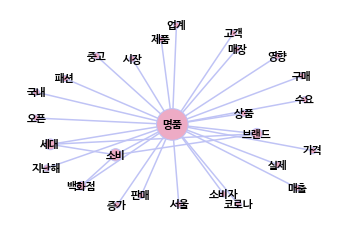

In [ ]:
show(30,15)

In [ ]:
import pandas as pd
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
from pandas import DataFrame
# import TfidfVectorizer
# news_df=pd.read_csv('/gdrive/MyDrive/project_1/test.csv')

In [ ]:
def clean_text(text):
    text = text.replace(".", "").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text
def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['NNG', 'NNP', 'VA', 'XR'] and len(s) >1]
    return nouns

def tokenize(df):
    tokenizer = Mecab(dicpath='/usr/local/lib/mecab/dic/mecab-ko-dic')
    processed_data = []
    for sent in tqdm(df['content']):
        sentence = clean_text(str(sent).replace("\n", "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data
def save_processed_data(processed_data):
    with open("tokenized_data_", 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)



In [ ]:
!sudo apt-get install curl git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.68.0-1ubuntu2.16).
git is already the newest version (1:2.25.1-1ubuntu3.10).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1020k      0  0:00:01  0:00:01 --:--:-- 1020k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/example.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.c
mecab-0.996-ko-0.9.2/example/example.c
mecab-0.996-ko-0.9.2/example/thread_test.cpp
mecab-0.996-ko-0.9.2/mecab-config.in
mecab-0.996-ko-0.9.2/man/
mecab-0.996-ko-0.9.2/man/Makefile.am
mecab-0.996-ko-0.9.2/man/mecab.1
mecab-0.996-ko-0.9.2/man/Makefile.in
mecab-0.996-ko-0.9.2/mecab.iss.in
mecab-0.996-ko-0.9.2/config.guess
mecab-0.996-ko-0.9.2/README
mecab-0.996-ko-0.9.2/COPYING
mecab-0.996-ko-0.9.2/CHANGES.md
mecab-0.996-ko-0.9.2/README.md
mecab-0.996-ko-0.9.2/INSTALL
mecab-0

In [ ]:
!pip install MeCab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 KB 5.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
df = pd.read_csv("/gdrive/MyDrive/project_1/test.csv")
df=df.iloc[:,1:]
df.columns=['content']
df.dropna(how='any')
processed_data = tokenize(df)
save_processed_data(processed_data)

100%|██████████| 24/24 [00:00<00:00, 167.74it/s]


In [ ]:
df

,content
0,"\n""명품 가격 그렇게 올리더니""...올 들어 보복소비 '뚝'\n\n기사내용 요약보..."
1,"\n""쥐뿔도 없이 호텔·오마카세·명품…2030 분수 모르고 살기 좋은 韓""\n\n직..."
2,\n'남이 쓰던 물건? 오히려 좋아'…중고명품에 꽂힌 2030\n\n\n\n\n\n...
3,"\n명품으로 흥행한 백화점 3사, ‘MZ전문관’ 만든 이유는?\n\n\n\n\n\n..."
4,\n소비 심리 꺾여도 e커머스는 '명품' 외치는 이유는\n\n\n\n\n\n소비심리...
5,\n“100만원에 사서 100만원에 판다” 명품 중고시장 휩쓰는 2030 [돈그랑땡...
6,\n“150만원 중고명품 한달 쓰고 150만원에 팔았어요”[이슈픽]\n\nMZ세대 ...
7,"\n""칵테일 기대돼 40분이나 기다렸어요"" 위스키 첫 맛보는 2030 오감 공략[현..."
8,\n“물건 살 때 다시 팔수 있나 생각하라” 2030 중고거래 선수의 꿀팁 [돈그랑...
9,"\n명품에선 이미 '큰손'…""2030 男 잡아라"" 트렌드 성지 점령하는 이것\n\n..."


In [ ]:
processed_data = [sent.strip().split(",") for sent in tqdm(open("tokenized_data_",'r',encoding='utf-8').readlines())]
processed_data = DataFrame(processed_data)
processed_data[0] = processed_data[0].replace("", np.nan)
processed_data = processed_data[processed_data[0].notnull()]
processed_data = processed_data.values.tolist()
processed_data2=[]
for i in processed_data:
    i = list(filter(None, i))
    processed_data2.append(i)
processed_data = processed_data2
processed_data

100%|██████████| 24/24 [00:00<00:00, 11626.62it/s]


[['명품',
  '가격',
  '복소',
  '뚝기',
  '사내',
  '요약',
  '보복',
  '소비',
  '고물가',
  '생활비',
  '명품',
  '소비',
  '가격',
  '정책',
  '세대',
  '심리',
  '부담',
  '서울',
  '뉴시스',
  '김근수',
  '기자',
  '프랑스',
  '명품',
  '브랜드',
  '샤넬',
  '제품',
  '가격',
  '인상',
  '인상',
  '발표',
  '가운데',
  '오전',
  '서울',
  '시내',
  '백화점',
  '입구',
  '사람',
  '제품',
  '구매',
  '서울',
  '뉴시스',
  '이지영',
  '기자',
  '코로나',
  '촉발',
  '보복',
  '소비',
  '양상',
  '고물가',
  '폭발',
  '성장세',
  '명품',
  '소비',
  '명품',
  '매장',
  '새벽',
  '서던',
  '오픈',
  '최근',
  '주춤',
  '모양새',
  '대기',
  '번호표',
  '밤샘',
  '불사',
  '열혈',
  '고객',
  '힘들',
  '백화점',
  '입구',
  '의자',
  '텐트',
  '모습',
  '유통',
  '업계',
  '롯데',
  '신세계',
  '현대',
  '백화점',
  '명품',
  '매출',
  '전년',
  '동기',
  '대비',
  '평균',
  '롯데',
  '증가',
  '신세계',
  '현대',
  '지난해',
  '기간',
  '명품',
  '매출',
  '롯데',
  '전년',
  '동기',
  '대비',
  '신세계',
  '현대',
  '명품',
  '성장세',
  '작년',
  '하반기',
  '시작',
  '상반기',
  '자릿수',
  '성장',
  '둔화',
  '올해',
  '마이너스',
  '올해',
  '백화점',
  '명품',
  '실적',
  '주춤',
  '이유',
  '고물가',
  '소비',
  '둔화',
  '전문가',
  '물가',
  

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
dictionary = corpora.Dictionary(processed_data)

In [ ]:
dictionary.filter_extremes(no_below=2, no_above=0.5)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

In [ ]:
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -3.9591.
[([(0.038955268, '가격'),
   (0.01688406, '인상'),
   (0.013561625, '오픈'),
   (0.0129506895, '현상'),
   (0.012590062, '패션'),
   (0.010740705, '올해'),
   (0.009736305, '코로나'),
   (0.008550154, '롯데'),
   (0.008179022, '매장'),
   (0.007974809, '거래'),
   (0.007792838, '샤넬'),
   (0.0075448933, '현대'),
   (0.0072352695, '중고'),
   (0.0071591493, '불황'),
   (0.0070167845, '트렌드'),
   (0.0070122397, '고물가'),
   (0.006979274, '수요'),
   (0.0069333627, '판매'),
   (0.00689217, '신세계'),
   (0.006471001, '국내')],
  -0.8676486960041099),
 ([(0.047980912, '패션'),
   (0.024163662, '거래'),
   (0.021339906, '중고'),
   (0.009635655, '번개'),
   (0.009633961, '장터'),
   (0.009609122, '행사'),
   (0.009232945, '카테고리'),
   (0.008451595, '플랫'),
   (0.00834076, '올해'),
   (0.008334791, '분석'),
   (0.008237704, '이상'),
   (0.007820609, '합리'),
   (0.0076948795, '트렌드'),
   (0.007631787, '판매'),
   (0.00752948, '진행'),
   (0.007387357, '할인'),
   (0.0071247783, '가치'),
   (0.00698841, '업체'),
   (0.0066396487, 

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, '/gdrive/MyDrive/project_1/topic_model.html')

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# Add every font at the specified location
# font_dir = ['./fonts']
# for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
#     print(mpl.font_manager.FontProperties(fname=font).get_name())
#     mpl.font_manager.fontManager.addfont(font)

In [ ]:
mpl.font_manager.findSystemFonts

<function matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')>

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
ci = [pd.read_csv("/gdrive/My Drive/01_project/ci_csv/"+file, parse_dates=["EXAMIN_BEGIN_DE"]) for file in files]

In [ ]:
df = pd.concat(ci)

In [ ]:
desc=pd.read_excel('/gdrive/My Drive/01_project/def_columns.xls')
df.columns=desc['컬럼한글명']

In [ ]:
# raw data :컬럼타입 변경
df.성별구분코드=df.성별구분코드.astype('category')
df.조사시작일자=df.조사시작일자.astype('category')
df.연령대구분명=df.연령대구분명.astype('category')
df.가구소득정도명=df.가구소득정도명.astype('category')
df.답변자거주지역명=df.답변자거주지역명.astype('category')

In [ ]:
# 1. 평균 여가시간 자료
# 1-1. 주말 일평균 레저 시간
weekend=df.groupby(df.조사시작일자)['주말일평균레저시간값']
weekend_avg=weekend.mean().round(1)  # 일간 평균시간
# 1-2. 평일 일평균 레저 시간
weekday=df.groupby(df.조사시작일자)['평일일평균레저시간값']
weekday_avg=weekday.mean().round(1)
# 1-3. 일평균 레저시간
aweek=df.groupby(df.조사시작일자)['1주총레저시간값']
aweek_avg=(weekend.mean()).round(1)

In [ ]:
# (보충자료: 통계청자료 /표본수 연도별 만개) 통계청자료 활용 일일평균 여가시간 산출
kosis_weekend=pd.read_csv('/gdrive/My Drive/01_project/지난_1년_동안_휴일_하루_평균_여가시간_20230315234034.csv',encoding='cp949')
kosis_weekend.head(2)
selected_cols = ['통계분류(2)','2019.6', '2020.6', '2021.6']
kosis_weekend_rev= kosis_weekend[selected_cols]

kosis_weekday=pd.read_csv('/gdrive/My Drive/01_project/지난_1년_동안_평일_하루_평균_여가시간_20230317111838.csv',encoding='cp949')
kosis_weekday.head(2)
selected_cols = ['통계분류(2)','2019.6', '2020.6', '2021.6']
kosis_weekday_rev= kosis_weekday[selected_cols]
kosis_weekday_rev.index.name='평일'

# 통계청 '19-21년자료는 지난 일년간의 여가시간에 대한 통계자료로 편의상 '18/'19'/'20으로 표기
kosis_aweek=pd.Series({'2018':round(((3.5*5)+(5.4*2))/7,1),
                        '2019':round(((3.7*5)+(5.6*2))/7,1),
                        '2020':round(((3.8*5)+(5.8*2))/7,1)})
plt.figure(figsize=(12,4))
kosis_aweek=kosis_aweek.T
kosis_aweek

2018    4.0
2019    4.2
2020    4.4
dtype: float64

<Figure size 864x288 with 0 Axes>

In [ ]:
# 통계청자료와 문화포털자료 합쳐줌
aweek_all=kosis_aweek.append(aweek_avg)  # list_name.append(element)

<ipython-input-18-3a3a8d5140a2>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aweek_all=kosis_aweek.append(aweek_avg)  # list_name.append(element)


In [ ]:
# 코로나 확진자자수
covid=pd.DataFrame({'infector':[0,0,26564,82565,183680,215009,2288947,9962498,4143373,866392,
                    256101,1407983,3472043,1523764,789036,1541960,1961322,1118079]}
       ,index=['2018년','2019년','2020년', '2021년 11월','2021년 12월','2022년 1월','2022년 2월',
         '2022년 3월','2022년 4월','2022년 5월','2022년 6월','2022년 7월','2022년 8월',
         '2022년 9월','2022년 10월','2022년 11월','2022년 12월','2023년 1월'])

In [ ]:
plt.rc('font', family='NanumBarunGothic')

<ipython-input-21-9fbe54a73443>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(mth,rotation=45)


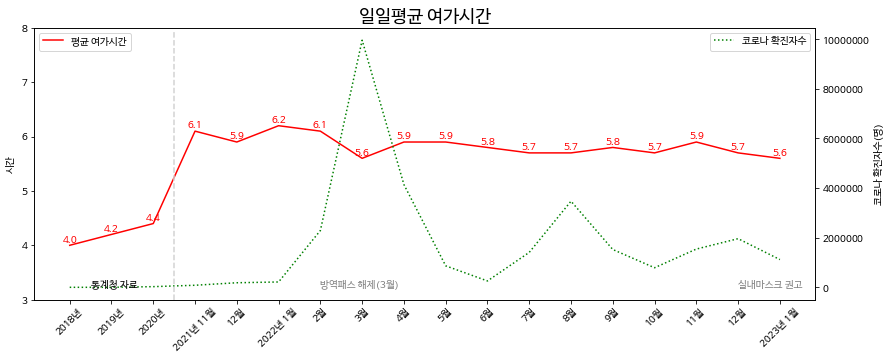

In [ ]:
from matplotlib.ticker import ScalarFormatter    # y축의 범위차로 인해 발생한 le7 표기 에러 제거용

mth=['2018년','2019년','2020년', '2021년 11월','12월','2022년 1월','2월',
         '3월','4월','5월','6월','7월','8월',
         '9월','10월','11월','12월','2023년 1월']
y2=aweek_all.values
fig,ax0=plt.subplots(figsize=(14,5))
plt.ylim(3,8)
ax1=ax0.twinx()

ax0.set_title('일일평균 여가시간',fontsize=18)
ax0.plot(aweek_all.values,'r',label='평균 여가시간')
ax0.set_ylabel('시간')
ax0.grid(False)
ax0.legend(loc=2)
ax0.set_xticklabels(mth,rotation=45)

ax1.plot(covid,'g:',label='코로나 확진자수')
ax1.set_ylabel('코로나 확진자수(명)')
ax1.grid(False)
ax1.legend(loc=1)

# 구분선 추가
plt.axvline(x=2.5,ymin=0.0,ymax=0.99,color='lightgrey',linestyle='dashed')  # 자료구분선 통계정/문화빅데이터플랫폼

# 그래프에 값 표기
for i, j in zip(range(len(mth))[::1], y2[::1]):
    ax0.text(i, j, round(j, 2), color='red', ha='center', va='bottom', size = 10)

# 텍스트 추가
plt.text(0.5,7.9,'통계청 자료',color='black')
plt.text(6,10,'방역패스 해제(3월)',color='grey')
plt.text(16,8,'실내마스크 권고',color='grey')

# le7 표기 제거
formatter = ScalarFormatter(useOffset=False, useMathText=True)
formatter.set_scientific(False)
ax1.yaxis.set_major_formatter(formatter)

plt.show()

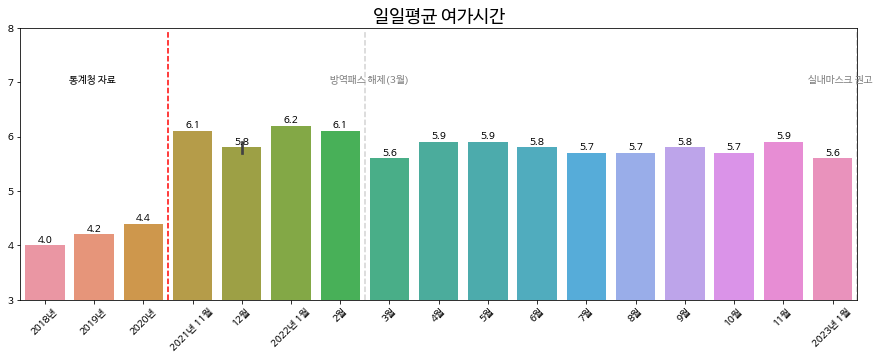

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(15, 5))
plt.title('일일평균 여가시간', fontsize=18)
plt.xticks(rotation=45)
plt.ylim(3,8)

def animate(i):
    global bar

    ax.clear()
    plt.ylim(0, 8)
    plt.ylabel('시간')
    plt.xlabel(None)

# 구분선 추가
plt.axvline(x=2.5, ymin=0.0, ymax=0.99, color='red', linestyle='dashed')  # 자료구분선 통계정/문화빅데이터플랫폼
plt.axvline(x=6.5, ymin=0.0, ymax=0.99, color='lightgrey', linestyle='dashed')  # 22년3월 방역패스 해지, 확진자수 최대
plt.axvline(x=16.5, ymin=0.0, ymax=0.99, color='lightgrey', linestyle='dashed') # 실내마스크 권고

month_subset = mth[:i+1]
data_subset = aweek_all[:i+1]

bar = sns.barplot(x=month_subset, y=data_subset.values, ax=ax)
plt.title('일일평균 여가시간', fontsize=18)

# 바그래프 값 추가
for rect in bar.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, '%.1f' % height, ha='center', va='bottom', size=10)

# 텍스트 추가
plt.text(0.5, 7, '통계청 자료', color='black')
plt.text(5.8, 7, '방역패스 해제(3월)', color='grey')
plt.text(15.5, 7, '실내마스크 권고', color='grey')

ani = animation.FuncAnimation(fig, animate, frames=10, repeat=True)
plt.show()

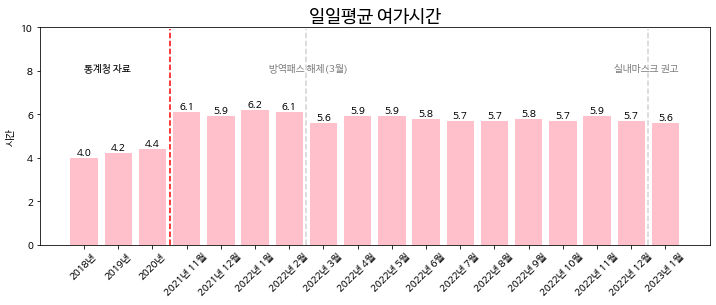

In [ ]:
mth=['2018년','2019년','2020년', '2021년 11월','2021년 12월','2022년 1월','2022년 2월',
         '2022년 3월','2022년 4월','2022년 5월','2022년 6월','2022년 7월','2022년 8월',
         '2022년 9월','2022년 10월','2022년 11월','2022년 12월','2023년 1월']

plt.figure(figsize=(12,4))
plt.title('일일평균 여가시간',fontsize=18)

plt.xticks(rotation=45)
bar=plt.bar(mth,aweek_all.values,color='pink')
plt.ylabel('시간')
plt.xlabel(None)
plt.ylim(0,10)

# 구분선 추가
plt.axvline(x=2.5,ymin=0.0,ymax=0.99,color='red',linestyle='dashed')        # 자료구분선 통계정/문화빅데이터플랫폼
plt.axvline(x=6.5,ymin=0.0,ymax=0.99,color='lightgrey',linestyle='dashed')  # 22년3월 방역패스 해지, 확진자수 최대
plt.axvline(x=16.5,ymin=0.0,ymax=0.99,color='lightgrey',linestyle='dashed') # 실내마스크 권고

# 바그래프 값 추가
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)

# 텍스트 추가
plt.text(0,8,'통계청 자료',color='black')
plt.text(5.4,8,'방역패스 해제(3월)',color='grey')
plt.text(15.5,8,'실내마스크 권고',color='grey')


plt.show()

In [ ]:
# 2. 레저시간 사용비율
# 2-1. 휴식오락사용비율
ent=df.groupby(df.조사시작일자)['레저시간휴식오락사용비율']
ent_avg=ent.mean().round(1)
# 2-2. 취미사용비율
hob=df.groupby(df.조사시작일자)['레저시간취미사용비율']
hob_avg=hob.mean().round(1)
# 2-3. 본인계발사용비율
selfdev=df.groupby(df.조사시작일자)['레저시간본인계발사용비율']
selfdev_avg=selfdev.mean().round(1)
# 2-4. 대인관계교제사용비율
social=df.groupby(df.조사시작일자)['레저시간대인관계교제사용비율']
social_avg=social.mean().round(1)

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


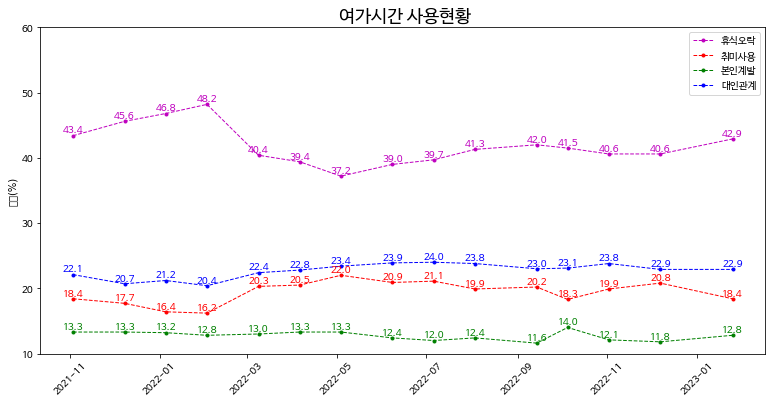

In [ ]:
xlabel_font={'family':'Noto Sans KR','size':10}
ylabel_font={'family':'Noto Sans KR','size':10}

f1=plt.figure(figsize=(13,6))
plt.title(' 여가시간 사용현황',fontsize=18)
plt.ylim(10,60)

plt.plot(ent_avg,'mo--',ms=3,lw=1,label='휴식오락')
plt.plot(hob_avg,'ro--',ms=3,lw=1,label='취미사용')
plt.plot(selfdev_avg,'go--',ms=3,lw=1,label='본인계발')
plt.plot(social_avg,'bo--',ms=3,lw=1,label='대인관계')

ent_label=[ent_avg.values]
plt.xticks(rotation=45)

# 그래프상에 값 표시
for x, y in zip(ent_avg.index, ent_avg):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom', color='m',fontsize=10)

for x, y in zip(hob_avg.index, hob_avg):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom', color='r',fontsize=10)

for x, y in zip(selfdev_avg.index, selfdev_avg):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom', color='g',fontsize=10)

for x, y in zip(social_avg.index, social_avg):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom',  color='b',fontsize=10)

plt.legend()
plt.xlabel(None,fontdict=xlabel_font)
plt.ylabel('비율(%)',fontdict=ylabel_font)
plt.show()

In [ ]:
satis=pd.read_csv('/gdrive/My Drive/01_project/satis_level.csv',encoding='cp949')

In [ ]:
df1=pd.DataFrame({
    '2019':[0.1,0.2,9.1,48.2,33.6,8.8],
    '2020':[0.1,0.1,0.2,5.5,25.1,50.6],
    '2021':[0.1,0.2,7.4,27.9,43.5,21]
},index=['불만족','다소불만족','보통','다소만족','만족','매우만족'])
df1

,2019,2020,2021
불만족,0.1,0.1,0.1
다소불만족,0.2,0.1,0.2
보통,9.1,0.2,7.4
다소만족,48.2,5.5,27.9
만족,33.6,25.1,43.5
매우만족,8.8,50.6,21.0


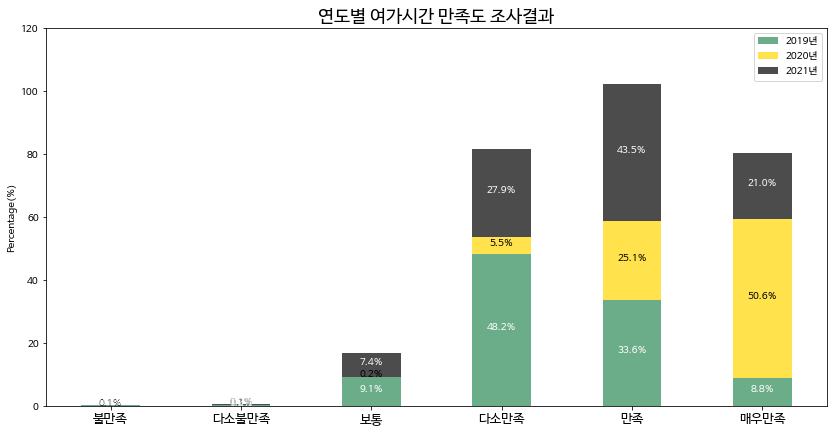

In [ ]:
# set the width of the bars
bar_width = 0.45
plt.figure(figsize=(14,6))
plt.ylim(0,120)

# create the bars for each year
plt.bar(df1.index, df1['2019'], width=bar_width, label='2019년',color='seagreen',alpha=0.7)
plt.bar(df1.index, df1['2020'], width=bar_width, bottom=df1['2019'], label='2020년',color='gold',alpha=0.7)
plt.bar(df1.index, df1['2021'], width=bar_width, bottom=df1['2019'] + df1['2020'], label='2021년',color='black',alpha=0.7)

# add labels inside each bar
for i in range(len(df1)):
    plt.text(df1.index[i], df1['2019'][i]/2, f'{df1["2019"][i]}%', ha='center', color='white')
    plt.text(df1.index[i], df1['2019'][i]+df1['2020'][i]/2, f'{df1["2020"][i]}%', ha='center', color='black')
    plt.text(df1.index[i], df1['2019'][i]+df1['2020'][i]+df1['2021'][i]/2, f'{df1["2021"][i]}%', ha='center', color='white')

plt.ylabel('Percentage(%)')
plt.title('연도별 여가시간 만족도 조사결과',fontsize=18)
plt.subplots_adjust(top=1) # bar 간격 조절
plt.xticks(fontsize=13)
plt.legend()
plt.show()